## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

We were motivated to work on this problem because the prospect of working with sports data was exciting and new to us. One of our members, Atharva, is also a pretty big professional basketball fan, and of course, Northwestern men's basketball had a stellar season in 2023. As a result, we wanted to take a look at how we could use the tools at our disposal to see how the professional teams we adore make decisions about stellar college athletes, like the ones we've been fortunate to watch over the last year. 

## Problem statement 

Describe your problem statement. Articulate your objectives using absolutely no jargon. 

Given a Division I college basketball player's basic information and in-game statistics, we want to determine the likelihood that they are drafted into the National Basketball Association at the end of a given year. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

The data we used was "College Basketball 2009-2021 + NBA Advanced Stats," provided by Aditya Kumar on Kaggle. 

https://www.kaggle.com/datasets/adityak2003/college-basketball-players-20092021

The dataset contained the names of 25,719 Division I NCAA men's basketball players alongside their schools, conferences, grades (meaning year in school), and assorted statistics, such as effective field goal percentage. Another dataset contained the draft results for 779 of the players from the prior set, and we used that data to produce a column in the first sheet with 1s and 0s to indicate whether a given player was drafter or not - this was our response column. 

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

The stakeholders in our project include college basketball players, first and foremost, who should be able to look at the data and determine whether they have a decent change of getting drafted if they forgo their eligibility and declare for the NBA draft, since that's a huge decision on their part. Their coaches and universities also want to know their chances of getting drafted in a given year, since if a player chooses to stay, they can continue to play for the university and gain them acclaim, or if they choose to get drafted and do indeed get drafted, there's greater exposure of that university's basketball program to prospective high school players and college basketball TV broadcasters. 

The final major stakeholder is NBA teams, who get the chance to see how college players stats have influenced past draft decisions, and can base their own draft decisions in upcoming drafts off of them, if they compare our findings to how the drafted players performed in the pros. 

## Data quality check / cleaning / preparation 

Show the distribution of the response here. Report the standard deviation and mean in case of a regression problem, and proportion of 0s and 1s in case of classification.

For all other content, as mentioned below, just provide the highlights *(if any)* and put the details in the appendix.

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Mention any useful insights you obtained from the data quality check that helped you develop the model or helped you realize the necessary data cleaning / preparation. Its ok if there were none.

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? Were there missing values? How did you handle them? Its ok if the data was already clean.

Did you do any data wrangling or data preparation before the data was ready to use for model development? Did you create any new predictors from exisiting predictors? For example, if you have number of transactions and spend in a credit card dataset, you may create spend per transaction for predicting if a customer pays their credit card bill. Mention the steps at a broad level, you may put minor details in the appendix. Only mention the steps that ended up being useful towards developing your model(s).

0.0    50059
1.0     1317
Name: drafted, dtype: int64

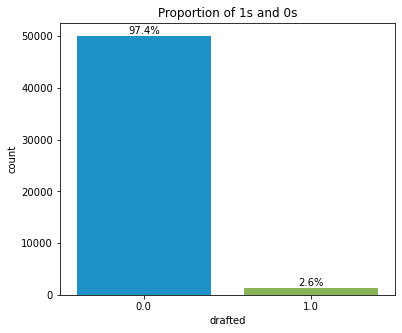

In [3]:
#| echo: false

# Distibution of 1s and 0s
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stats_unique = pd.read_csv('stats_unique_no_missing.csv')

plt.figure(figsize=(6,5))
plt.title("Proportion of 1s and 0s")
ax = sns.countplot(data=stats_unique, x='drafted', palette=['#039be5','#8bc34a'])
for c in ax.containers:
    
    labels = [f'{h/stats_unique.drafted.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    
    ax.bar_label(c, labels=labels, label_type='edge')
    
stats_unique.drafted.value_counts()

The distribution of the continuous variables used in the analysis is:

In [50]:
stats_unique[list(stats_unique.columns[0:14])].describe()

,Unnamed: 0,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per
count,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000
mean,32637.945247,24.522656,40.624101,94.637070,18.715653,46.760411,49.872317,5.532299,12.827992,11.162979,21.233907
std,16223.682206,8.801572,26.923393,21.006166,5.337342,14.096928,12.965181,8.666942,8.531460,8.223106,9.267233
min,4589.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18585.750000,19.000000,15.700000,86.800000,15.100000,42.100000,45.670000,2.100000,8.900000,5.400000,15.700000
50%,32692.500000,28.000000,40.400000,98.000000,18.400000,48.300000,51.440000,4.500000,12.200000,9.500000,19.500000
75%,46678.250000,31.000000,64.200000,107.000000,22.000000,53.600000,56.370000,8.100000,16.100000,15.300000,24.700000
max,61057.000000,41.000000,96.700000,484.600000,50.000000,150.000000,150.000000,1576.600000,1385.000000,100.000000,100.000000


In [52]:
stats_unique[list(stats_unique.columns[14:28])].describe()

,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr
count,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000
mean,34.966463,49.956789,0.621721,44.197038,90.796189,0.451602,16.888119,49.143919,0.243202,1.935462,1.731904,38.283714
std,36.461026,48.772419,0.228727,43.114231,83.490341,0.158652,21.639506,57.984626,0.180867,5.363574,1.430146,32.976196
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,11.000000,0.542000,9.000000,21.000000,0.399000,0.000000,2.000000,0.000000,0.200000,1.000000,21.900000
50%,23.000000,35.000000,0.670000,31.000000,67.000000,0.469000,7.000000,25.000000,0.290000,1.000000,1.600000,33.400000
75%,52.000000,75.000000,0.765000,68.000000,139.250000,0.531000,27.000000,80.000000,0.362000,2.600000,2.200000,47.900000
max,273.000000,357.000000,1.000000,333.000000,678.000000,1.000000,147.000000,394.000000,1.000000,1072.000000,118.200000,1000.000000


In [54]:
stats_unique[list(stats_unique.columns[28:41])].describe()

,porpag,adjoe,pfr,year,pid,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,dunksmade
count,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000
mean,0.864290,92.629423,4.231803,2015.526939,35273.006579,0.949488,29.100261,48.795858,14.987679,41.756657,3.977382
std,1.350190,22.452605,4.096287,3.446912,19367.178466,0.703999,29.784260,46.880884,17.414587,43.869663,7.977467
min,-6.792410,-39.021300,0.000000,2010.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.110817,82.382525,2.900000,2013.000000,19885.000000,0.473684,6.000000,11.000000,2.000000,8.000000,0.000000
50%,0.506240,95.735500,3.800000,2016.000000,33992.000000,0.836234,20.000000,35.000000,9.000000,27.000000,1.000000
75%,1.622345,106.826000,5.100000,2019.000000,47997.000000,1.283441,44.000000,74.000000,22.000000,62.000000,4.000000
max,8.658190,382.666000,720.000000,2021.000000,74230.000000,14.007605,247.000000,358.000000,222.000000,532.000000,122.000000


In [57]:
stats_unique[list(stats_unique.columns[41:52])].describe()

,dunksmiss+dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm
count,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000
mean,4.473159,103.269594,103.307959,1.559867,88.357364,-2.058173,-1.651562,-0.406612,-2.143289,18.345416,-1.820818
std,8.747251,9.356904,10.188471,1.035231,62.555628,6.626976,4.474168,3.645268,6.256832,10.026583,4.745248
min,0.000000,-1330.060000,-1292.020000,-0.314065,0.045436,-58.570000,-52.569600,-57.459400,-121.379000,0.000000,-97.115200
25%,0.000000,99.043550,97.994350,0.695574,31.742600,-4.849302,-3.675090,-2.052635,-4.861343,9.500000,-4.042930
50%,1.000000,103.485500,103.586500,1.406085,84.183600,-1.526020,-1.156010,-0.433303,-1.542580,18.413800,-1.388165
75%,5.000000,107.830000,108.895000,2.276840,137.263750,1.551553,1.066667,1.212710,1.464508,27.111100,1.045470
max,132.000000,131.461000,142.789000,5.645940,360.572000,685.313000,161.995000,523.319000,46.448900,39.942900,42.198800


In [58]:
stats_unique[list(stats_unique.columns[52:63])].describe()

,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65,drafted
count,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000,51376.000000
mean,-0.322471,0.823468,2.066351,2.889820,1.167297,0.572737,0.306464,6.299386,5.393443,0.025635
std,2.469325,0.733749,1.456800,2.059264,1.182446,0.462330,0.425429,4.883081,4.832052,0.158044
min,-46.596400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.554095,0.285700,0.925900,1.307700,0.307700,0.214300,0.038500,2.185200,0.877209,0.000000
50%,-0.241386,0.600000,1.821400,2.500000,0.785700,0.478300,0.157900,5.200000,4.888170,0.000000
75%,1.075617,1.166700,2.906200,4.000000,1.645200,0.833300,0.400000,9.572300,8.523395,0.000000
max,38.033900,5.933300,11.545500,15.000000,10.000000,4.000000,5.258100,30.090900,127.274000,1.000000


The distribution of the categorical variables used in the analysis is:

In [10]:
stats_unique.describe(include=object)

,player_name,team,conf,yr,ht,num,type,Unnamed: 64
count,51376,51376,51376,51376,51376,51376,51376,51376
unique,21983,362,36,5,31,76,1,8
top,Chris Smith,Arkansas Pine Bluff,ACC,Jr,7-Jun,1,all,Wing G
freq,14,181,2055,13954,5309,2654,51376,11885


In [27]:
value_counts_team = stats_unique['team'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts_yr = stats_unique['yr'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts_conf = stats_unique['conf'].value_counts().rename_axis('value').reset_index(name='counts')
value_counts = pd.concat([value_counts_team[0:5], value_counts_yr[0:5], 
                          value_counts_conf[0:5]], keys = ['Team','Year','Conference'])
value_counts

value  counts
Team       0  Arkansas Pine Bluff     181
           1                 Army     180
           2       North Carolina     180
           3                 Navy     175
           4            Air Force     171
Year       0                   Jr   13954
           1                   Fr   13132
           2                   So   12159
           3                   Sr   12124
           4                 None       7
Conference 0                  ACC    2055
           1                  A10    1995
           2                  SEC    1988
           3                  B10    1932
           4                 CUSA    1931

## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

For our EDA, we ultimately didn't find any useful insights and kept all variables in our models.

In terms of visual EDA, boxplots of our target variable, `drafted`, were made against the numerical variables. We found that a majority of the variables had a relationship with `drafted` and it did not provide us with any real insights as to drop some variables because there were so many that *did* seem important (see appendix for all visualizations). Thus, we tried moving onto some other forms of EDA to see if anything helped.

Moving onto correlation coefficients, most variables had a similar correlation coefficient (ranging from 0.27 to 0.1). Due to a majority of variables being within a similiar range, it did not give us great insight into specific variables. Some variables had lower correlation coefficients (variables that represented percentages), but we decided to keep those in our data.

Lastly, we checked the VIF values for *most* of the variables. We could not do all of them due to an error: **"TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''"**. Thus, we could not perform a multicolinearity check on all variables, so our methodology may not be perfect and it's possible that we may have missed some collinear variables. However, we were able to check the VIFs of 30 variables and found their numbers to be acceptable (less than 10). Thus, there was no reason to drop variables from this last step. 

Note that you can write code to publish the results of the code, but hide the code using the yaml setting `#|echo: false`. For example, the code below makes a plot, but the code itself is not published with Quarto in the report.

In [15]:
#| echo: false


## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

Our problem, which is trying to determine the likelihood of a NCAA college basketball player being drafted into the NBA, was not answered on Kaggle. The closest solution was a person trying to predict what pick a player should be taken; this was a linear regression problem.

For our models, we decided to use Random Forest, Decision Trees, AdaBoost, and XGBoost models to try and answer the question of the likelihood of being drafted into the NBA. One issue that we encountered was that our dataset was incredibily imbalanced. Without any data cleaning, only 2.6% of the data was classified as class 1 (being drafted). Even after cleaning the data, the imbalanced still remained at 2.5% being class 1. Thus, we decided to try and optimize recall and accuracy as much as possible. While we wanted our model to be accurate, we also wanted to lower the amount of false negatives as much as we possibily could. Since being drafted into the NBA is so unlikely, we didn't want our models to "miss" out on a great player that would have been drafted, but was not selected to by our model. Thus, when we created our models and visualized accuracy/recall at different thresholds, they were quite skewed (sharp turns, extremely high accuracy all around, etc.). Thus, the values for hyperparameters are very specific for each model to try and maximize accuracy and recall.



## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### RandomForest & Adaboost
*By Lilly Sorkin*

#### Random Forest
I did an initial broad gridsearch, before adjusting my window and trying again. My last RandomForestClassifier grid:  
`params = {'bootstrap': [True, False],
          'n_estimators': [10, 300, 500, 1000],
          'max_depth': [20, 25, 30, 35],
          'max_leaf_nodes': [100, 500, 1000]}`

My final RandomForestClassifier model, with parameters dictated by the above's results:  
`model1 = RandomForestClassifier(random_state=45, bootstrap=False, n_estimators=500, max_leaf_nodes=500, max_depth=20, n_jobs=-1)
model1.fit(X_train, y_train)`

I then ran a cross_val_predict and accuracy/recall plot to find the optimal decision threshold for the model. The decision threshold I found best was 0.05.

#### Adaptive Boosting
I did an initial broad gridsearch, before adjusting my window and trying again. My last AdaBoostClassifier grid:  
`params = {'base_estimator': [DecisionTreeClassifier(max_depth=7),
                              DecisionTreeClassifier(max_depth=8),
                              DecisionTreeClassifier(max_depth=9)],
           'n_estimators': [5, 10, 15],
           'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05]}`

My final AdaBoostClassifier model, with parameters dictated by the above's results:  
`model2 = AdaBoostClassifier(random_state=45, base_estimator=DecisionTreeClassifier(max_depth=8),  n_estimators=10, learning_rate=0.02)
model2.fit(X_train, y_train)`

I then ran a cross_val_predict and accuracy/recall plot to find the optimal decision threshold for the model. The decision threshold I found best was 0.005.

### Bagged Decision Trees
*By Isabel Knight*

For my model, I ran the following parameter grid search using RandomizedSearchCV using a KFold of 3:

`params = {'base_estimator': [DecisionTreeClassifier(random_state = 45)],
          'n_estimators': [250, 400, 800, 1200],
          'max_features': [0.3, 0.5, 0.7, 1],
          'max_samples': [0.5, 1],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}`

Unfortuntely, my machine (or Google Colab) could not handle a lot of the computations of the parameter grid; it was so bad that I had to use another student's PC to even *run* a grid search using these parameters. So I had to make some adjustments, such as using `RandomziedSearchCV` instead of `GridSearchCV` and a KFold of 3 instead of 5). If I had a better computer, I probably could have done a finer tuned grid search after this. 

From this search, I created the following model based on the best parameters found:

`best_model_1 = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 45),
                                 n_estimators = 250, 
                                 max_features = 0.3, 
                                 max_samples = 0.5,
                                 bootstrap = False, 
                                 bootstrap_features = True, 
                                 random_state = 45, 
                                 n_jobs = -1).fit(X_train, y_train)`
                                 
After doing so, I plotted the model's accuracy, recall, and precision over different thresholds using cross_val_predict to see what values may seem optimal. I also created a dataframe of these values and called upon it to see what thresholds returned a training accuracy *and* recall above 90%. While 6 thresholds fit these conditions, I felt that a threshold of **0.048** returned the best balance between accuracy and recall. 

After seeing the test accuracy/recall using this model at a threshold of 0.048, I did not feel that I needed to rerun a hyperparamter grid search. From these values, I was able to attain a test accuracy of 91.56% and a test recall of 94.09%. With these numbers so high, there didn't seem to be a need for a better model.

### XGBoost
*By Atharva Weling*

My first step was to undertake a RandomizedSearchCV with a KFold of 3 splits. Due to the amount of time it took my machine to go through even this search, I decided against going through with a more thorough GridSearch or a finer RandomizedSearch, just for the sake of time. The grid of hyperparameters I used was as below.

`params = {'base_estimator': [XGBClassifier(random_state=45, scale_pos_weight=spw)],
          'n_estimators': [25, 50, 100],
          'max_depth': [6, 8, 10],
          'learning_rate': [0.01, 0.05, 0.1],
          'gamma': [0.1, 0.25, 0.5],
          'reg_lambda': [0.001, 0.01, 0.1]
          'subsample':[0.1, 0.3, 0.5]}`

The "spw" value that is in the place of scale_pos_weight is something I found by dividing the number of class 0 observations by the number of class 1 observations, rather than further complicating my RandomizedSearch by adding another hyperparameter. I ended up creating the following model based on the best hyperparams from the RandomizedSearch, as well as a little trial and error using the model itself

`model_xgb = xgb.XGBClassifier(objective = 'binary:logistic', 
                              random_state = 45, 
                              gamma = 0.5, 
                              learning_rate = 0.01,
                              max_depth = 6, 
                              n_estimators = 25,
                              reg_lambda = 0.01,
                              subsample = 0.75
                              scale_pos_weight = spw).fit(X_train, y_train)`

I then plotted the precision, recall and accuracy of the model versus the threshold using cross_val_predict, and used this plot to find a threshold that would maximize accuracy, but more importantly, recall. I settled on 0.44, which provided me with a test accuracy and recall of 84.75% and 87.52% respectively and a train accuracy and recall of 85.38% and 98.82% respectively. There likely could have been an improvement on the model if I were able to GridSearch other values, but with the time limits I was under, I decided to settle on this as my best option with a high recall. 

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble

For our voting ensemble, we chose a soft-voting ensemble of all of our best models. When comparing the test classification accuracies of all of our models, the voting ensemble did the best (although Random Forest and Bagging Decision Trees came close) with the following scores:

`Adaboost accuracy = 97.396%
Random forest accuracy = 98.078%
Bagging Decision Trees accuracy = 98.067%
XGBoost accuracy = 94.860%
Soft-voting ensemble accuracy= 98.112%`

After creating the ensemble, we followed the same procedure of using cross_val_predict() to compute the accuracy and recall scores across different thresholds and plotting them. After doing so and also creating a dataframe of these values, we found that the threshold **0.138327** yielded the optimal balance between recall and accuracy. Using this ensemble at a threshold of 0.138327, this yields a test accuracy of 91.87% and a recall of 92.73%.

### Stacking ensemble


Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

For our stacking ensemble, we chose a stacking classifer of all of our best models with a logistic regression model as our final estimator. When comparing the test classication accuracies of all of our models, the stacking classifier did the best
with the following scores:

`Adaboost accuracy = 97.396%
Random forest accuracy = 98.078%
Bagging Decision Trees accuracy = 98.067%
XGBoost accuracy = 94.860%
Soft-voting ensemble accuracy= 98.112%
Stacking Classifier Ensemble accuracy = 98.169%`

After creating the ensemble, we followed the same procedure of using cross_val_predict() to compute the accuracy and recall scores across different thresholds and plotting them. After doing so and also creating a dataframe of these values, we found that the threshold **0.012832** yielded the optimal balance between recall and accuracy. Using this ensemble at a threshold of 0.012832 this yields a test accuracy of 92.09% and recall of 92.27%

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

For some of our individual models, there is certainly a possibility that given more time and resources (such as unlimited Google Colab credits :) ), we may have been able to put together more thorough, finer gridsearches to have better hyperparameters for our models. However, we did otherwise produce the best models we could regarding our decision thresholds given the hyperparameters we were able to glean from our searches. 

It won't be difficult at all for the stakeholders to collect the data relating to our model predictors, it's all readily available for most college basketball players through their team's coaching staff and team statisticians. The data needed to predict the draft likelihood of any given player will be ready at the end of the college basketball season, a couple months before the NBA draft, giving all stakeholders that window to make predictions and actions based off of them, which is plenty of time for a player to decide whether to declare for the draft or not. 

Our model will likely be too obsolete to be useful in ten or fifteen years. The style of basketball being played in the pros is always changing. For instance, in the last decade, the massive rise in three-point shooting in the NBA has changed the profile of players being drafted. Assuming changes like this continue to happen, the profile of players being drafted in a decade will likely be too different for our data to accurately predict draft likelihood using the outcomes of players being judged by a very different set of criteria. 

## Other sections *(optional)*

You are welcome to introduce additional sections or subsections, if required, to address any specific aspects of your project in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Lilly Sorkin</td>
    <td>AdaBoost & Random Forest</td>
    <td>Data cleaning and EDA</td>    
    <td>Removed missing values and kept last known instances of each player</td>
  </tr>
    <tr>
    <td>Isabel Knight</td>
    <td>Bagged Decision Trees</td>
    <td> EDA and writeup </td>    
    <td> Visualized data/VIFs/Correlation/Soft Voting/Stacking Ensembles</td>
  </tr>
    <tr>
    <td>Atharva Weling</td>
    <td>XGBoost</td>
    <td> Further EDA, writeups </td>    
    <td> Completed written sections of report, EDA for XGBoost hyperparams</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material
fg324.pdf. 3


## this is for understanding some variables and what they mean!!!

https://hackastat.eu/en/learn-a-stat-box-plus-minus-and-vorp/

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

### EDA Visualizations and Print-outs

#### Boxplots

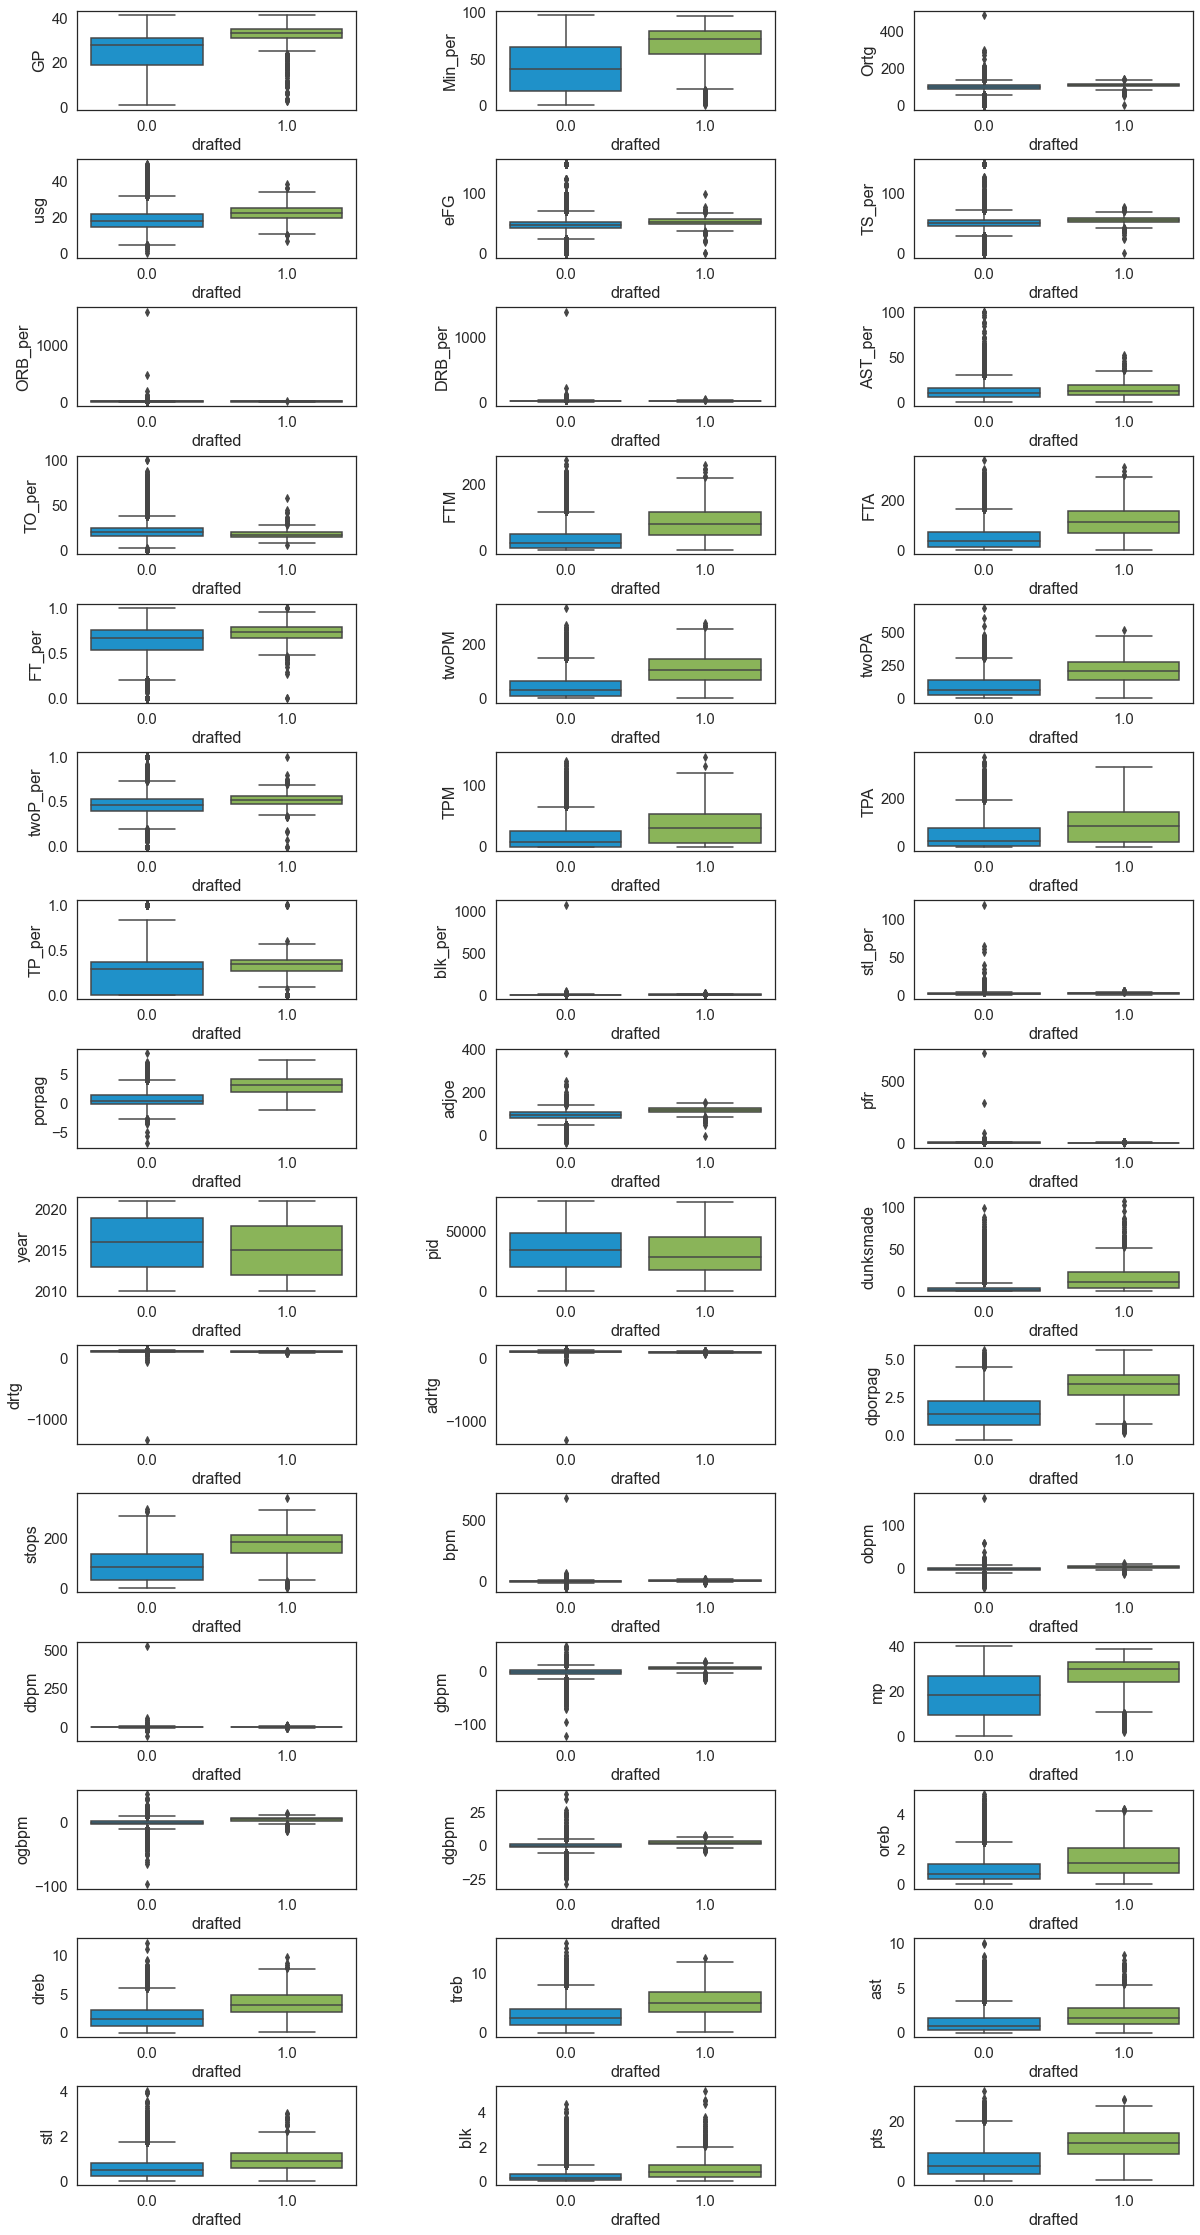

In [12]:

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(font_scale=1.35)
sns.set_style("white")

data = stats_unique
y = data.drafted
X = data.drop("drafted", axis = 1)

# Creating training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 45, stratify = y)
#remaking the dataframe as one for now
training = pd.concat([X_train, y_train], axis=1)
predictors = list(training.columns)
#removing cols we don't need
    #did this by hand by looking at df
predictors.remove("player_name")    
predictors.remove("rimmade+rimmiss")
predictors.remove('midmade+midmiss')
predictors.remove('dunksmiss+dunksmade')
predictors.remove('Unnamed: 64')
predictors.remove('Unnamed: 65')
predictors.remove('Unnamed: 0')
predictors.remove('drafted')
predictors.remove('ast/tov')
predictors.remove('team')
predictors.remove('num')
predictors.remove('rimmade')
predictors.remove('midmade')
predictors.remove('dunksmade')
predictors.remove('type')

#dropping cols in training
training = training.drop(columns = ["player_name", "rimmade+rimmiss", 'midmade+midmiss','dunksmiss+dunksmade',
                                    'Unnamed: 64', 'Unnamed: 65', 'drafted', 'ast/tov', 'team', 'num', 'rimmade',
                                    'midmade','type', 'Unnamed: 0'])

#eda of numeric vars
lst_num = list(training.columns)
lst_num.remove('conf')
lst_num.remove('ftr')
lst_num.remove('ht')
lst_num.remove('yr')


train = pd.concat([training, y_train], axis=1)



fig, axes = plt.subplots(15, 3,figsize=(20,40))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
lst_array = np.reshape(lst_num, (15, 3))

for i in range(15):
    for j in range(3):
        sns.boxplot(ax=axes[i,j], data=train, x='drafted', y=lst_array[i,j], palette=['#039be5','#8bc34a'])

#### Print-outs of Correlations and VIF values

In [13]:
from sklearn.model_selection import train_test_split
#getting data together
y = stats_unique.drafted
X = stats_unique.drop("drafted", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 45, stratify = y)
train = pd.concat([X_train, y_train], axis=1)

# doing VIF to see if there is multicollinearity
X = train[[
 'GP',
 'Min_per',
 'Ortg',
 'usg',
 'eFG',
 'FTM', 'gbpm',
 'mp',
 'ogbpm',
 'dgbpm',
 'oreb',
 'dreb',
 'treb',
 'ast',
 'stl',
 'blk',
 'pts', 'year',
 'dunksmade',
 'drtg',
 'adrtg',
 'dporpag',
 'stops',
 'bpm',
 'obpm',
 'dbpm',
'porpag',
 'adjoe',
 'pfr',  'ftr',
 'TPM',
 'TPA']]

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

      feature           VIF
0       const  4.098124e+05
1          GP  5.267728e+00
2     Min_per  3.723151e+01
3        Ortg  5.958917e+01
4         usg  9.092864e+00
5         eFG  2.738516e+00
6         FTM  7.984735e+00
7        gbpm  3.144752e+11
8          mp  4.566735e+01
9       ogbpm  1.834909e+11
10      dgbpm  4.885446e+10
11       oreb  2.464871e+08
12       dreb  9.641284e+08
13       treb  1.932100e+09
14        ast  4.294720e+00
15        stl  5.015702e+00
16        blk  3.147298e+00
17        pts  3.509848e+01
18       year  1.215063e+00
19  dunksmade  2.435787e+00
20       drtg  2.074089e+01
21      adrtg  2.728501e+01
22    dporpag  1.646862e+01
23      stops  4.480383e+01
24        bpm  4.180257e+11
25       obpm  1.691620e+11
26       dbpm  1.412805e+11
27     porpag  1.268483e+01
28      adjoe  9.733488e+01
29        pfr  4.034867e+00
30        ftr  1.216181e+00
31        TPM  4.627397e+01
32        TPA  4.590078e+01


In [14]:
train.corrwith(train.drafted).sort_values(ascending = False)

drafted                1.000000
porpag                 0.269704
dporpag                0.261532
dunksmade              0.259806
dunksmiss+dunksmade    0.257656
twoPM                  0.234439
twoPA                  0.219719
FTM                    0.219499
stops                  0.218270
FTA                    0.216490
midmade                0.215466
midmade+midmiss        0.215431
rimmade                0.212921
pts                    0.197635
dreb                   0.192771
gbpm                   0.190630
rimmade+rimmiss        0.188822
treb                   0.183458
ogbpm                  0.172477
adjoe                  0.172340
blk                    0.163858
bpm                    0.163275
obpm                   0.160318
dgbpm                  0.149386
Min_per                0.147309
mp                     0.146288
GP                     0.136458
oreb                   0.132381
stl                    0.130433
TPM                    0.124622
ast                    0.119604
TPA     